In [1]:
import os
import pandas as pd
from activity_count_function import *
from zurich_move_group_function import *
from zurich_move_pipeline_function import *
from zurich_move_utilites import get_statistics

C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# PATH # 

initial_path = '../CreateStudy'

# Constant # 
threshold_labels = ['CT', 'OT']
side_labels = ['LW', 'RW', 'bilateral']
metric_labels = ['Sensitivity', 'Specificity', 'Accuracy']
csv_file_names = ['evaluation_metrics.csv', 'optimal_functional_spaces.csv', 'optimal_threshold.csv']
conventional_threshold_ac = 2
conventional_functional_space = 30

In [3]:
# Individuals boxplots #

In [4]:
# Get the  csv files for each participant 
csv_files_dict = find_specific_csv_files(initial_path, csv_file_names)

evaluation_metrics =  csv_files_dict['evaluation_metrics.csv']
optimal_functional_spaces = csv_files_dict['optimal_functional_spaces.csv']
optimal_threshold = csv_files_dict['optimal_threshold.csv']

In [5]:
# Get the data from the csv files 
# Evaluation metrics on unseen data for AC Threshold 
group_evaluation_metrics = regroup_field_data_metrics(evaluation_metrics)
# Get group values for AC 
optimal_threshold_LW, optimal_threshold_RW = extract_data_from_csv(optimal_threshold)
# Get group values for FS 
optimal_functional_spaces_LW, optimal_functional_spaces_RW = extract_data_from_csv(optimal_functional_spaces)

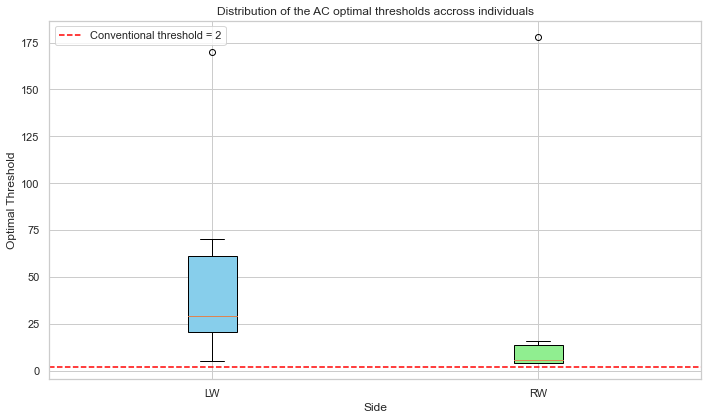

In [6]:

plot_side_by_side_boxplots(optimal_threshold_LW, optimal_threshold_RW, conventional_threshold_ac, 'Distribution of the AC optimal thresholds accross individuals')

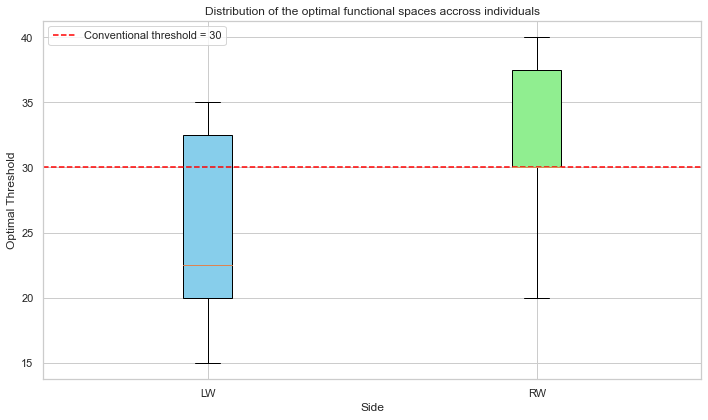

In [7]:
plot_side_by_side_boxplots(optimal_functional_spaces_LW, optimal_functional_spaces_RW, conventional_functional_space, 'Distribution of the optimal functional spaces accross individuals')

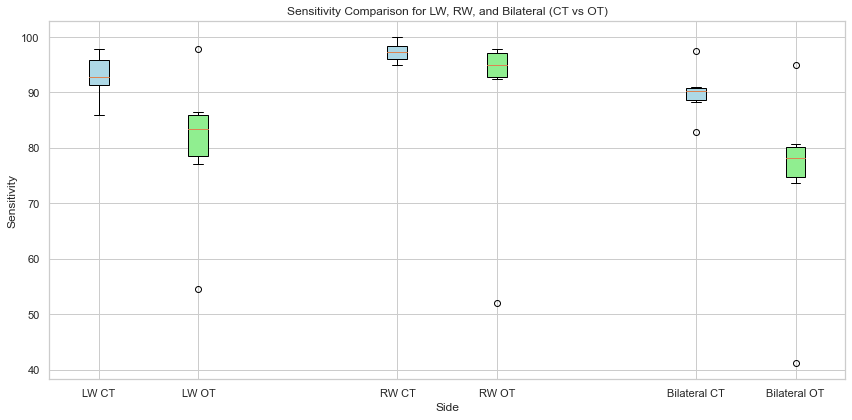

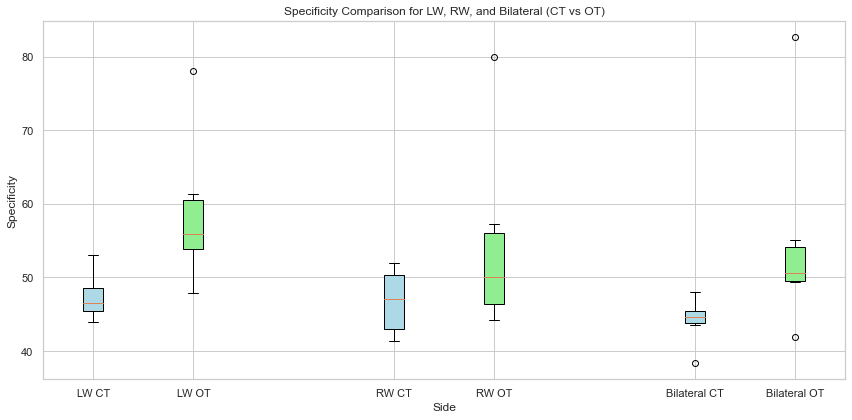

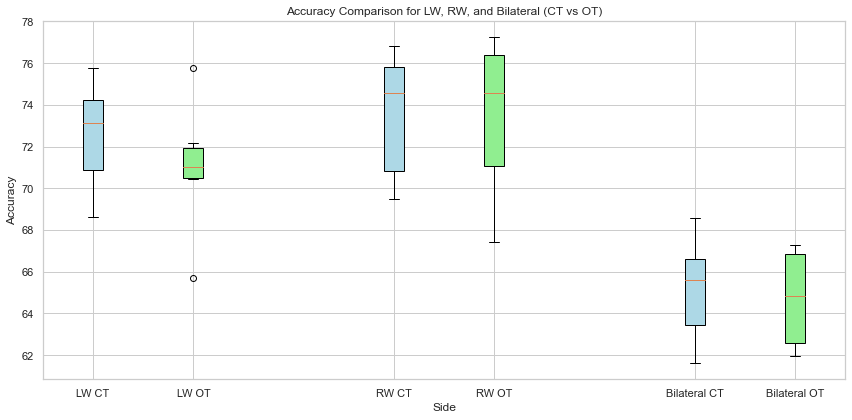

In [8]:
metric_names_to_plot = ['Sensitivity', 'Specificity', 'Accuracy']
plot_side_metrics(group_evaluation_metrics, metric_names_to_plot)
# Sensitivity measures the ability of a model to correctly identify positive instances
# (e.g., the presence of a certain condition or event).
# Specificity measures the ability of a model to correctly identify negative instances
#(e.g., the absence of a certain condition or event).
# Accuracy measures the overall correctness of the model's predictions, considering both true positives and true negatives.

In [9]:
# Group Analysis #

In [10]:
# Constant # 
group_csv_file_names = ['count_brond_LW.csv', 'count_brond_RW.csv', 'GT_mask_LW_1Hz.csv', 'GT_mask_RW_1Hz.csv']

In [11]:
# Get the  csv files for each participant 
group_csv_files_dict = find_specific_csv_files(initial_path, group_csv_file_names)

count_brond_LW =  group_csv_files_dict['count_brond_LW.csv']
count_brond_RW = group_csv_files_dict['count_brond_RW.csv']
GT_mask_LW_1Hz = group_csv_files_dict['GT_mask_LW_1Hz.csv']
GT_mask_RW_1Hz = group_csv_files_dict['GT_mask_RW_1Hz.csv']

In [12]:
group_count_brond_LW = get_group_data_from_csv(count_brond_LW)
group_count_brond_RW = get_group_data_from_csv(count_brond_RW)
group_GT_mask_LW_1Hz = get_group_data_from_csv(GT_mask_LW_1Hz, mask=True)
group_GT_mask_RW_1Hz = get_group_data_from_csv(GT_mask_RW_1Hz, mask=True)

Elements removed in array 1: 258
Elements removed in array 2: 114
Elements removed in array 3: 124
Elements removed in array 4: 148
Elements removed in array 5: 0
Elements removed in array 6: 60
Elements removed in array 1: 258
Elements removed in array 2: 114
Elements removed in array 3: 124
Elements removed in array 4: 148
Elements removed in array 5: 0
Elements removed in array 6: 60
Elements removed in array 1: 258
Elements removed in array 2: 114
Elements removed in array 3: 124
Elements removed in array 4: 148
Elements removed in array 5: 0
Elements removed in array 6: 59
Elements removed in array 1: 258
Elements removed in array 2: 114
Elements removed in array 3: 124
Elements removed in array 4: 148
Elements removed in array 5: 0
Elements removed in array 6: 59


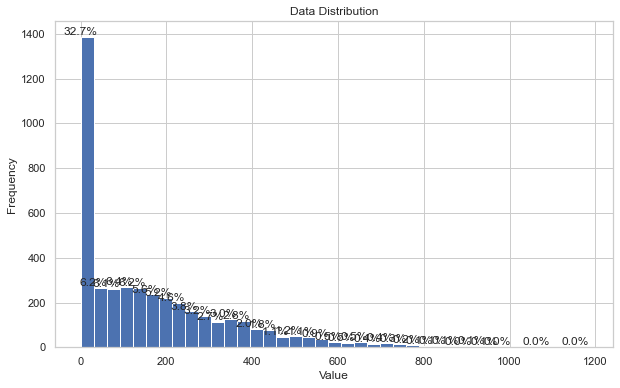

{'mean': 165.3928355042409,
 'median': 115.63761137406027,
 'iqr': 251.4801838126646,
 'range': 1182.5954973874682,
 'std': 180.61224803833437,
 'max': 1182.5954973874682,
 'min': 0.0,
 'num_elements': 4248}

In [13]:
get_statistics(group_count_brond_LW)

In [14]:
# Perform ROC for the entire group 

Thresholds tested: [0.00000000e+00 1.18260732e-02 2.36521465e-02 ... 1.18257185e+03
 1.18258367e+03 1.18259550e+03]


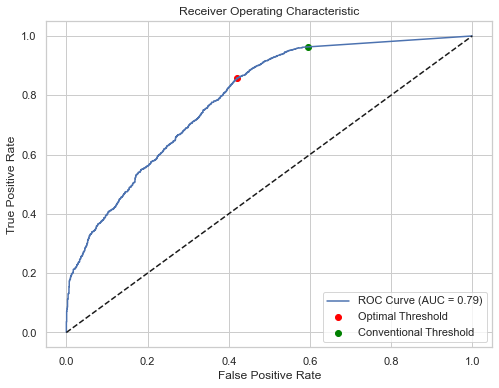

AUC: 0.79
Optimal Threshold: 29.84
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Thresholds tested: [0.00000000e+00 1.02274920e-02 2.04549839e-02 ... 1.02271851e+03
 1.02272874e+03 1.02273897e+03]


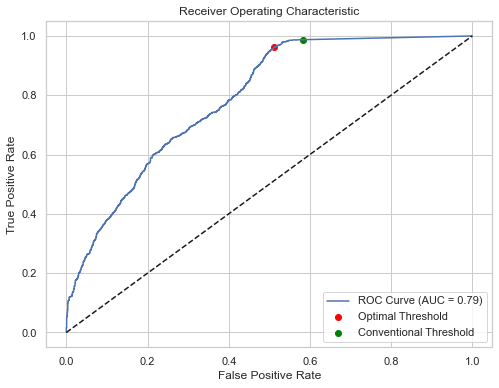

AUC: 0.79
Optimal Threshold: 7.70
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)


In [15]:
# Split the dataset: 80% to find the optimal threshold, 20% to evaluate this new treshold on unseen data 

# Splitting the data for the left wrist
X_LW = group_count_brond_LW
y_LW = group_GT_mask_LW_1Hz
X_train_LW, X_eval_LW, y_train_LW, y_eval_LW = train_test_split(X_LW, y_LW, test_size=0.2, random_state = 42)

# Splitting the data for the right wrist
X_RW = group_count_brond_RW
y_RW = group_GT_mask_RW_1Hz
X_train_RW, X_eval_RW, y_train_RW, y_eval_RW = train_test_split(X_RW, y_RW, test_size=0.2, random_state = 42)

# Bilateral evaluation mask
mask_bilateral_eval = get_mask_bilateral(y_eval_LW, y_eval_RW)

# Find the optimal threshold for unilateral usage of the UL 
conventional_threshold_unilateral = 2 # Bailey and Lang, 2013
conventional_threshold_bilateral = 0 # Bailey and Lang, 2013
optimal_threshold_LW = find_optimal_threshold(y_train_LW, X_train_LW, conventional_threshold_unilateral)
optimal_threshold_RW = find_optimal_threshold(y_train_RW, X_train_RW, conventional_threshold_unilateral)

In [16]:
# Predictions using the optimal and conventional thresholds 

# Compute predictions using conventional threshold for unilateral usage
pred_conv_LW = get_prediction(X_eval_LW, conventional_threshold_unilateral)
pred_conv_RW = get_prediction(X_eval_RW, conventional_threshold_unilateral)

# Compute predictions using optimal threshold for unilateral usage
pred_opt_LW = get_prediction(X_eval_LW, optimal_threshold_LW)
pred_opt_RW = get_prediction(X_eval_RW, optimal_threshold_RW)
# Compute predictions using conventional threshold for bilateral usage
pred_conv_bilateral = get_prediction_bilateral(X_eval_LW, conventional_threshold_unilateral, X_eval_RW, conventional_threshold_unilateral)

# Compute predictions using optimal threshold for bilateral usage
pred_opt_bilateral = get_prediction_bilateral(X_eval_LW, optimal_threshold_LW, X_eval_RW, optimal_threshold_RW)

# Compute predictions using optimal threshold for bilateral usage
pred_opt_bilateral = get_prediction_bilateral(X_eval_LW, optimal_threshold_LW, X_eval_RW, optimal_threshold_RW)

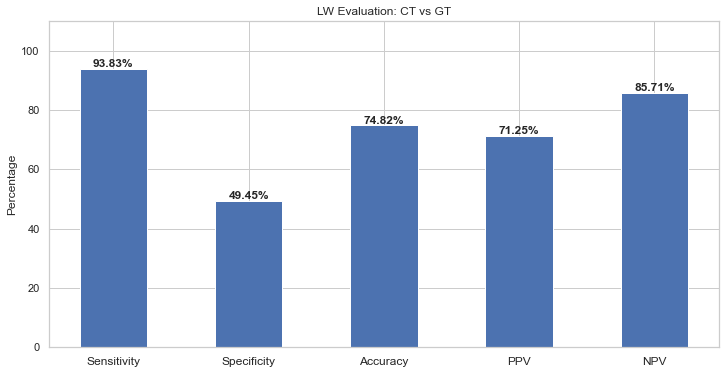

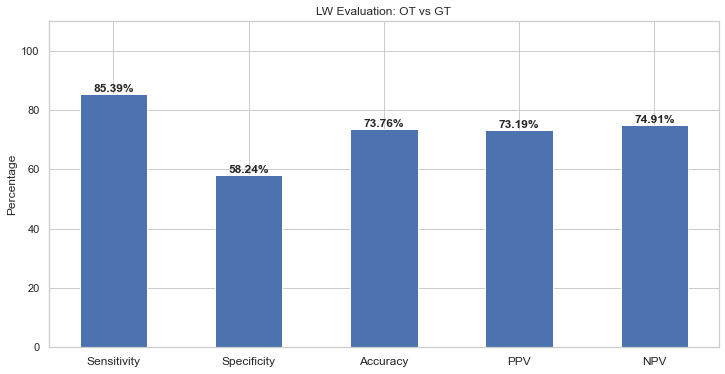

In [17]:
# Evaluation of the optimal threshold using the unseen data
metrics_LW_CT = get_evaluation_metrics(y_eval_LW, pred_conv_LW, 'LW Evaluation: CT vs GT')
metrics_LW_OT = get_evaluation_metrics(y_eval_LW, pred_opt_LW, 'LW Evaluation: OT vs GT')

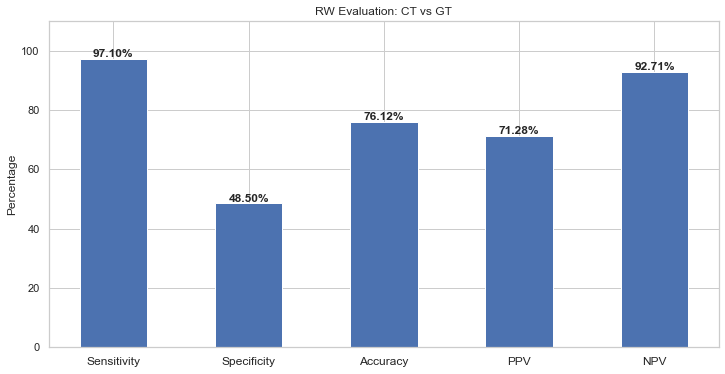

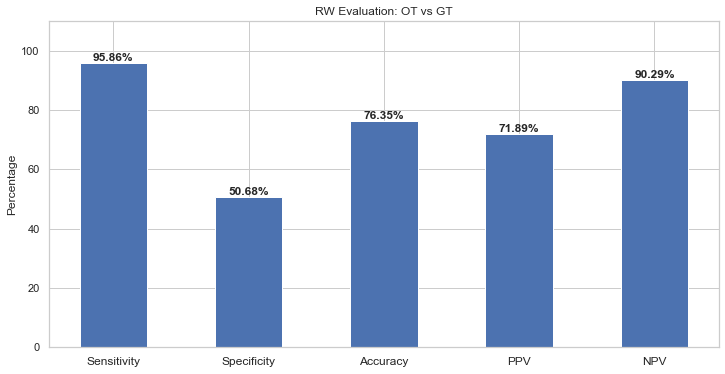

In [18]:
metrics_RW_CT = get_evaluation_metrics(y_eval_RW, pred_conv_RW, 'RW Evaluation: CT vs GT')
metrics_RW_OT = get_evaluation_metrics(y_eval_RW, pred_opt_RW, 'RW Evaluation: OT vs GT')

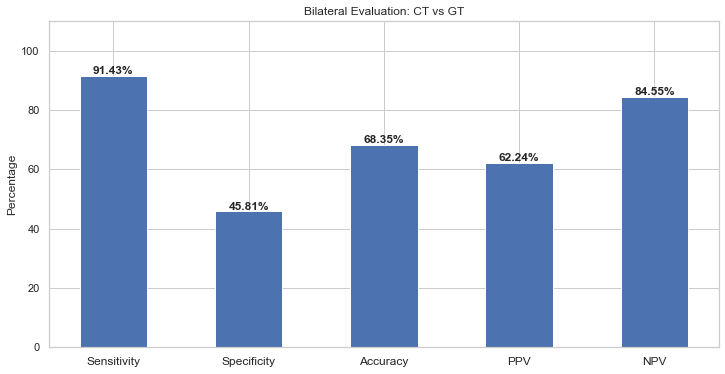

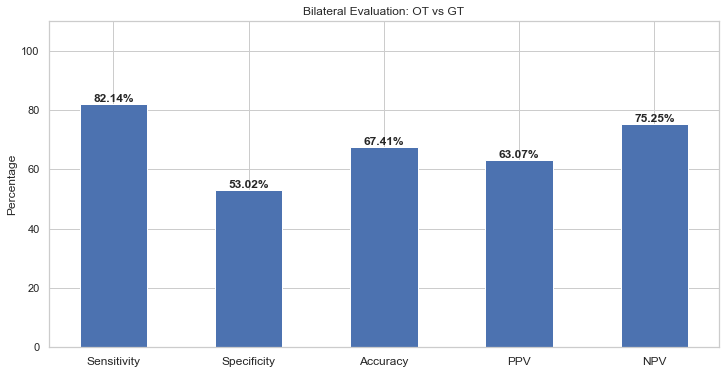

In [19]:
metrics_bilateral_CT = get_evaluation_metrics(mask_bilateral_eval, pred_conv_bilateral, 'Bilateral Evaluation: CT vs GT')
metrics_bilateral_OT = get_evaluation_metrics(mask_bilateral_eval, pred_opt_bilateral, 'Bilateral Evaluation: OT vs GT')

In [20]:
# Create a structure to save all the metrics 
metrics_dictionary = create_metrics_dictionary(metrics_LW_CT, metrics_RW_CT, metrics_bilateral_CT, metrics_LW_OT, metrics_RW_OT, metrics_bilateral_OT)
metrics_dictionary

{('OT_LW', 'Sensitivity'): 85.39094650205762,
 ('OT_LW', 'Specificity'): 58.24175824175825,
 ('OT_LW', 'Accuracy'): 73.76470588235294,
 ('OT_LW', 'PPV'): 73.19223985890653,
 ('OT_LW', 'NPV'): 74.91166077738515,
 ('OT_RW', 'Sensitivity'): 95.8592132505176,
 ('OT_RW', 'Specificity'): 50.68119891008175,
 ('OT_RW', 'Accuracy'): 76.3529411764706,
 ('OT_RW', 'PPV'): 71.8944099378882,
 ('OT_RW', 'NPV'): 90.29126213592234,
 ('OT_bilateral', 'Sensitivity'): 82.14285714285714,
 ('OT_bilateral', 'Specificity'): 53.02325581395348,
 ('OT_bilateral', 'Accuracy'): 67.41176470588235,
 ('OT_bilateral', 'PPV'): 63.07129798903108,
 ('OT_bilateral', 'NPV'): 75.24752475247524,
 ('CT_LW', 'Sensitivity'): 93.82716049382715,
 ('CT_LW', 'Specificity'): 49.45054945054945,
 ('CT_LW', 'Accuracy'): 74.82352941176471,
 ('CT_LW', 'PPV'): 71.25,
 ('CT_LW', 'NPV'): 85.71428571428571,
 ('CT_RW', 'Sensitivity'): 97.10144927536231,
 ('CT_RW', 'Specificity'): 48.50136239782017,
 ('CT_RW', 'Accuracy'): 76.11764705882354,
 

In [23]:
# Save metrics as csv file: evaluation metrics on unseen data 
save_metrics_dictionary_as_csv(metrics_dictionary, initial_path)
# Save optimal AC threhshold for this participant 
save_optimal_threshold(initial_path, optimal_threshold_LW, optimal_threshold_RW)

The metrics dictionary has been saved as ../CreateStudy\evaluation_metrics.csv.
Thresholds saved successfully at: ../CreateStudy\optimal_threshold.csv
